In [1]:
import sympy as sm
import sympy.physics.mechanics as me
#me.init_vprinting(use_latex='mathjax')

In [2]:
# class ReferenceFrame(me.ReferenceFrame):

#     def __init__(self, *args, **kwargs):

#         kwargs.pop('latexs', None)

#         lab = args[0].lower()
#         tex = r'\hat{{{}}}_{}'

#         super(ReferenceFrame, self).__init__(*args,
#                                              latexs=(tex.format(lab, 'x'),
#                                                      tex.format(lab, 'y'),
#                                                      tex.format(lab, 'z')),
#                                              **kwargs)
# me.ReferenceFrame = ReferenceFrame

### Масса

В прошлых разделах показаны инструменты для формулирования кинематики, точек и систем отсчета. 
Кинематика является первой из трех основных части, необходимых для формирования уравнений движения системы многих тел; остальные --- распределение массы и силы, действующие на систему.

Когда точка связана с частицей массы $m$, или система отсчета  связана с твердым телом, имеющим некоторое распределение массы, вторые законы движения [Ньютона](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) и [Эйлера](https://en.wikipedia.org/wiki/Euler%27s_laws_of_motion) показывают, что изменение во времени
* импульса (линейного момента) должно быть равно силам, действующим на частицу.
* углового момента должно быть равно крутящим моментам, на твердое тело. 

Импульс частицы определяется ее массой и скоростью.
Угловой момент твердого тела определяется распределением массы и его угловой скоростью. 


### Частицы и твердые тела

Понятия частиц и твердых тел — это абстракции реальных перемещающихся и вращающихся объектов. 

Частицы — это точки, расположенные в евклидовом пространстве и имеющие бесконечно малые по объему массы. 

Твердые тела – это системы отсчета, которые имеют ориентацию, которая имеет связанное с ней непрерывное распределение массы. Распределение массы можно представить как бесконечную совокупность точек, распределенных в конечной объемной границе. 
Все точки, распределенные в объеме фиксируются друг к другу и перемещаются вместе.

Например, самолет можно смоделировать как твердое тело, когда речь идет о его перемещении или ориентации, для исследования минимального радиуса поворота и угла крена. Но можно моделировать его как частицу, когда речь идет только о ее перемещении, например, когда наблюдаем движение самолета снаружи атмосферы Земли. 

### Масса

Если задано $\nu$ частиц с массами $m_1,\ldots,m_\nu$, общая масса, или нулевой момент масс этого множества определен как 

$$
   m := \sum_{i=1}^\nu m_i
$$

Например, какова масса объекта, состоящего из двух частиц массы $m$ и твердого тела с массой $m/2$? 

In [3]:
m = sm.symbols('m')

m_total = m + m + m/2
m_total

5*m/2



Для твердого тела с плотностью ρ определенной в каждой точке объёма V, общая масса это интеграл общего вида: 

$$
   m := \int_{\textrm{solid}} \rho dV
$$

Например, посчитаем массу конуса при одинаковой плотности ρ, радиус r и высота h.
 

In [4]:
p, r, h, z, theta = sm.symbols('rho, r, h, z, theta')

sm.integrate(p*r, (r, 0, r/h*z), (theta, 0, 2*sm.pi), (z, 0, h))

pi*h*r**2*rho/3

### Центр масс

Если для каждой частицы из некого множества $S$ задана позиция $\bar{r}^{P_i/O},\ldots,\bar{r}^{P_\nu/O}$ первый момент массы определяется как:

$$
   \sum_{i=1}^\nu m_i \bar{r}^{P_i/O}\textrm{.}
$$

Существует точка, в которой он равен нулю:

$$
   \sum_{i=1}^\nu m_i \bar{r}^{P_i/S_o} = 0\textrm{.}
$$

Эту точку $S_o$ определяют как *центр масс* множества частиц. 

Положение центра масс можно определить делением первого момента масс на нулевой (полную массу):

$$
   \bar{r}^{S_o/O} = \frac{ \sum_{i=1}^\nu m_i \bar{r}^{P_i/O} }{\sum_{i=1}^\nu m_i}\textrm{.}
$$

Для твердого тела, это записывается в виде интеграла:

$$
   \bar{r}^{S_o/O} = \frac{ \int_{\textrm{solid}} \rho \bar{r} dV }{ \int_{\textrm{solid}} \rho dV }
$$

Посчитаем центр масс в «SymPy Mechanics» используя три частицы в произвольных положениях относительно $O$:

In [5]:
m1, m2, m3 = sm.symbols('m1 m2 m3')
x1, x2, x3 = me.dynamicsymbols('x1 x2 x3')
y1, y2, y3 = me.dynamicsymbols('y1 y2 y3')
z1, z2, z3 = me.dynamicsymbols('z1 z2 z3')

A = me.ReferenceFrame('A')

zeroth_moment = (m1 + m2 + m3)

first_moment = (m1*(x1*A.x + y1*A.y + z1*A.z) +
                m2*(x2*A.x + y2*A.y + z2*A.z) +
                m3*(x3*A.x + y3*A.y + z3*A.z))
first_moment

(m1*x1(t) + m2*x2(t) + m3*x3(t))*A.x + (m1*y1(t) + m2*y2(t) + m3*y3(t))*A.y + (m1*z1(t) + m2*z2(t) + m3*z3(t))*A.z

In [6]:
r_O_So =  first_moment/zeroth_moment
r_O_So

(m1*x1(t) + m2*x2(t) + m3*x3(t))/(m1 + m2 + m3)*A.x + (m1*y1(t) + m2*y2(t) + m3*y3(t))/(m1 + m2 + m3)*A.y + (m1*z1(t) + m2*z2(t) + m3*z3(t))/(m1 + m2 + m3)*A.z

In [7]:
r_O_So.xreplace({m2: 2*m1, m3: 3*m1}).simplify()

(x1(t)/6 + x2(t)/3 + x3(t)/2)*A.x + (y1(t)/6 + y2(t)/3 + y3(t)/2)*A.y + (z1(t)/6 + z2(t)/3 + z3(t)/2)*A.z

### Инерция или распределение массы 

Инерция, или второй момент массы, описывает распределение массы относительно оси. Инерция характеризует «сопротивление» угловому ускорение точно так же, как масса характеризует «сопротивление» линейному ускорению. 

Для набора частиц $P_1,\ldots,P_\nu$ c позициями $\bar{r}^{P_1/O},\ldots,\bar{r}^{P_\nu/O}$ относительно точка $O$, *вектор инерции* относительно единичного вектора $\hat{n}_a$ определяется как:

$$
   \bar{I}_a := \sum_{i=1}^\nu m_i \bar{r}^{P_i/O} \times \left( \hat{n}_a \times
   \bar{r}^{P_i/O}  \right)
$$

Этот вектор описывает сумму вклада каждой частицы в общую массу, относительно прямой, параллельной $\hat{n}_a$ и проходящей через $O$. 




Рисунок показывает визуальное представление этого вектора для одной частицы $P$ массой $m$. 

![](figures/mass-inertia-vector.svg)

Для этой единственной частицы инерция:

$$
  \left| \bar{I}_a \right| = m \left| \bar{r}^{P/O} \right| ^2 | \sin\theta |
$$
где $\theta$ — угол между $\bar{r}^{P/O}$ и $\hat{n}_a$. 

Видно, что $\bar{I}_a$ всегда перпендикулярно $\bar{r}^{P/O}$ и пропорционально $m$, $| \bar{r}^{P/O} |^2$, и $\sin\theta$.

Если $\hat{n}_a$ параллельно $\bar{r}^{P/O}$ то величина $\bar{I}_a$` нулевая. 

Если $\hat{n}_a$ перпендикулярно $\bar{r}^{P/O}$ то величина инерции

$$
   \left| \bar{I}_a \right| = m \left| \bar{r}^{P/O} \right| ^2
$$


Вектор инерции полностью описывает распределение частиц относительно вектора $\hat{n}_a$ проходящего через $O$.

Проекция $\bar{I}_a$ в направлении $\hat{n}_b$ называется *скаляром инерции*:

$$
   I_{ab} := \bar{I}_{a} \cdot \hat{n}_b
$$

что можно переписать как

$$
   I_{ab} =
   \sum_{i=1}^\nu m_i
   \left( \bar{r}^{P_i/O} \times \hat{n}_a \right)
   \cdot
   \left( \bar{r}^{P_i/O} \times \hat{n}_b \right)\textrm{.}
$$

Из этого следует

$$
   I_{ab} = I_{ba}
$$

Если $\hat{n}_a = \hat{n}_b$ то скаляр инерции называется *моментом инерции*, и если $\hat{n}_a \neq \hat{n}_b$ ` то это *центробежный момент инерции* (*product of
inertia*). 

Моменты инерции определяют распределения масс относительно некой единой оси, а центробежный момент — относительно двух осей.

Если $\hat{n}_a = \hat{n}_b$ центробежный момент схлопывается до обычного момента инерции:

$$
   I_{aa} =
   \sum_{i=1}^\nu m_i
   \left( \bar{r}^{P_i/O} \times \hat{n}_a \right) \cdot
   \left( \bar{r}^{P_i/O} \times \hat{n}_a \right)
$$




Можно также определить *радиус инерции* $k_{aa}$, равный радиусу кольца, имеющего такой же момент инерции.

Радиус инерции относительно оси через $O$ параллельной $\hat{n}_a$:

$$
   k_{aa} := \sqrt{\frac{I_{aa}}{m}}
$$

Пример. Три массы $m$, $2m$, $3m$ могут скользить по кругу радиуса $r$, с фиксированными углами между ними.

![](figures/mass-ring.svg)

Надо найти острый угол от линии, проходящей от центра кольца к $m$ к линии, касательной к кольцу в точке $O$ что сводит к минимуму общий радиус вращения всех трех масс вокруг линии, касательной к кольцу. 

In [8]:
m, r, theta = sm.symbols('m r theta')
A = me.ReferenceFrame('A')

Векторы положения для каждой из масс: 

In [9]:
r_O_m = (r + r*sm.sin(theta))*A.x + r*sm.cos(theta)*A.y
r_O_2m = (r + r*sm.sin(theta + sm.pi/7))*A.x + r*sm.cos(theta + sm.pi/7)*A.y
r_O_3m = (r + r*sm.sin(theta - sm.pi/6))*A.x + r*sm.cos(theta - sm.pi/6)*A.y

Скаляр инерции для момента инерции относительно точки $O$ и $\hat{a}_y$

In [10]:
Iyy = (m*me.dot(r_O_m.cross(A.y), r_O_m.cross(A.y)) +
       2*m*me.dot(r_O_2m.cross(A.y), r_O_2m.cross(A.y)) +
       3*m*me.dot(r_O_3m.cross(A.y), r_O_3m.cross(A.y)))
Iyy

m*(r*sin(theta) + r)**2 + 2*m*(r*sin(theta + pi/7) + r)**2 + 3*m*(-r*cos(theta + pi/3) + r)**2

Признавая, что радиус вращения минимален, когда момент инерция минимизирована, можно взять производную момента инерции относительно θ и приравняем ее нулю. 

In [11]:
dIyydtheta = sm.simplify(Iyy.diff(theta))
dIyydtheta

2*m*r**2*((sin(theta) + 1)*cos(theta) + 2*(sin(theta + pi/7) + 1)*cos(theta + pi/7) - 3*(cos(theta + pi/3) - 1)*sin(theta + pi/3))

Мы можем сократить все на $mr^2$ решить численно, т.к. $\theta$ останется единственной переменной:


In [12]:
theta_sol = sm.nsolve((dIyydtheta/m/r**2).evalf(), theta, 0)
theta_sol

-1.49935061382135

В градусах это: 

In [13]:
import math

theta_sol*180/math.pi

-85.9064621823125

In [14]:
kyy = sm.sqrt(Iyy/m)
kyy

sqrt((m*(r*sin(theta) + r)**2 + 2*m*(r*sin(theta + pi/7) + r)**2 + 3*m*(-r*cos(theta + pi/3) + r)**2)/m)

Функция [`plot()`](https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot) может быстро нарисовать график функций одной переменной. 

Здесь мы видим, что вращение множества масс вокруг кольца будут максимизировать и минимизировать радиус вращения, и что наше решение является минимумом. 

Мы зафиксировали $m=r=1$, чтобы график был только от θ.

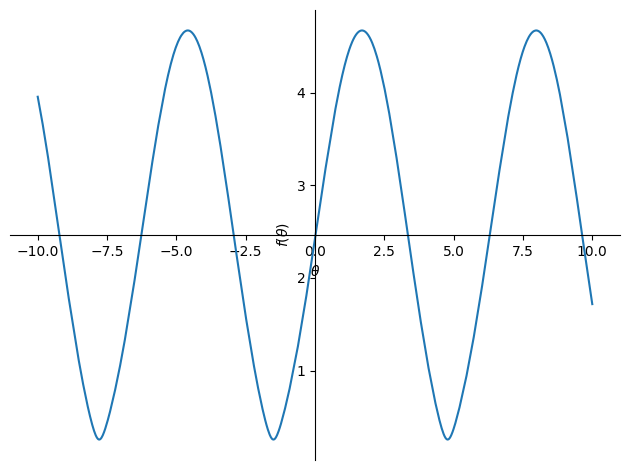

In [15]:
sm.plot(kyy.xreplace({m: 1, r: 1}));

In [16]:
kyy.xreplace({m: 1, r: 1, theta: theta_sol}).evalf()

0.255558185585985

### Матрица инерции

Для взаимно перпендикулярных единичных векторов, фиксированных в системе отсчета «A», можно вычислить моменты и произведения инерции относительно точки $O$ и каждого единичного вектора. 

Это приводит к девяти скалярам инерции (6 уникальных из-за симметрии, $I_{xy}=I_{yx}$, $I_{xz}=I_{zx}$, $I_{yz}=I_{zy}$), которые описывают массу распределение набора частиц или твердого тела в трехмерном пространстве. 

Эти скаляры обычно представляются в виде симметричной *матрицы инерции* (также называемой *тензор инерции* ), который принимает такой вид:

$$
   \begin{bmatrix}
    I_{xx} & I_{xy} & I_{xz} \\
    I_{yx} & I_{yy} & I_{yz} \\
    I_{zx} & I_{zy} & I_{zz}
   \end{bmatrix}_A
$$

где моменты инерции лежат на диагонали, а произведения инерции — это недиагональные записи. 

Индекс $A$ указывает на то, что эти скаляры рассчитаны относительно к базиса $\hat{a}_x,\hat{a}_y,\hat{a}_z$.

Эта матрица, так называемый *тензор второго порядка* аналогична векторам (или *тензору первого порядка*), который у нас уже был для скорости:

$$
\begin{bmatrix}
   v_1 \\
   v_2 \\
   v_3
   \end{bmatrix}_A = v_1\hat{a}_x + v_2\hat{a}_y + v_3\hat{a}_z
$$

Существует также аналогичная форма для [диадических](https://en.wikipedia.org/wiki/Dyadics) тензоров второго порядка, связанных с разными системами отсчета. 

## Диадики

Если мы введем [внешнее векторное произведение произведения](https://en.wikipedia.org/wiki/Outer_product) между двумя векторами, мы увидим, что он генерирует матрицу, похожую на приведенную выше матрицу инерции.

$$
   \begin{bmatrix}
   v_1 \\ v_2 \\ v_3
   \end{bmatrix}_A
   \otimes
   \begin{bmatrix}
     w_1 \\ w_2 \\ w_3
   \end{bmatrix}_A
   =
   \begin{bmatrix}
   v_1w_1 & v_1w_2 & v_1w_3 \\
   v_2w_1 & v_2w_2 & v_2w_3 \\
   v_3w_1 & v_3w_2 & v_3w_3 \\
   \end{bmatrix}_A
$$


В «SymPy Mechanics» так можно делать диадику $\breve{Q}$: 

In [17]:
v1, v2, v3 = sm.symbols('v1, v2, v3')
w1, w2, w3 = sm.symbols('w1, w2, w3')

A = me.ReferenceFrame('A')

v = v1*A.x + v2*A.y + v3*A.z
w = w1*A.x + w2*A.y + w3*A.z

Q = me.outer(v, w)
Q

v1*w1*(A.x|A.x) + v1*w2*(A.x|A.y) + v1*w3*(A.x|A.z) + v2*w1*(A.y|A.x) + v2*w2*(A.y|A.y) + v2*w3*(A.y|A.z) + v3*w1*(A.z|A.x) + v3*w2*(A.z|A.y) + v3*w3*(A.z|A.z)

In [18]:
Q.to_matrix(A)

Matrix([
[v1*w1, v1*w2, v1*w3],
[v2*w1, v2*w2, v2*w3],
[v3*w1, v3*w2, v3*w3]])

Диада состоит из скаляров, умноженных на диады единиц. Примеры «единиц измерения диады» – это: 

In [19]:
me.outer(A.x, A.x)

(A.x|A.x)

In [20]:
me.outer(A.x, A.x).to_matrix(A)

Matrix([
[1, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Единичные диады аналогичны единичным векторам. Всего существует девять диад единиц. связанный с тремя ортогональными единичными векторами. Вот еще один пример: 

In [21]:
me.outer(A.y, A.z)

(A.y|A.z)

In [22]:
me.outer(A.y, A.z).to_matrix(A)

Matrix([
[0, 0, 0],
[0, 0, 1],
[0, 0, 0]])

Эти единичные диады могут быть сформированы из любых единичных векторов. Это удобно потому что мы можем создавать диады, как и векторы, которые состоят из компоненты в разных системах отсчета. Например: 

In [23]:
theta = sm.symbols("theta")

A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

B.orient_axis(A, theta, A.x)

P = 2*me.outer(B.x, B.x) + 3*me.outer(A.x, B.y) + 4*me.outer(B.z, A.z)
P

2*(B.x|B.x) + 3*(A.x|B.y) + 4*(B.z|A.z)

Диада $\breve{P}$ может быть выражена через юнит-диады $A$:


In [24]:
P.express(A)

2*(A.x|A.x) + 3*cos(theta)*(A.x|A.y) + 3*sin(theta)*(A.x|A.z) - 4*sin(theta)*(A.y|A.z) + 4*cos(theta)*(A.z|A.z)

In [25]:
P.to_matrix(A)

Matrix([
[2, 3*cos(theta),  3*sin(theta)],
[0,            0, -4*sin(theta)],
[0,            0,  4*cos(theta)]])

… или $B$

In [26]:
P.express(B)

2*(B.x|B.x) + 3*(B.x|B.y) + 4*sin(theta)*(B.z|B.y) + 4*cos(theta)*(B.z|B.z)

In [27]:
P.to_matrix(B)

Matrix([
[2,            3,            0],
[0,            0,            0],
[0, 4*sin(theta), 4*cos(theta)]])

Диадическая единица:

In [28]:
U = me.outer(A.x, A.x) + me.outer(A.y, A.y) + me.outer(A.z, A.z)
U

(A.x|A.x) + (A.y|A.y) + (A.z|A.z)

… представляет собой единичную матрицу в A:

In [29]:
U.to_matrix(A)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Обратите внимание, что диадическая единица одинакова, если она выражена в любой системе отсчета: 

In [30]:
U.express(B).simplify()

(B.x|B.x) + (B.y|B.y) + (B.z|B.z)

### Свойства диадик 

Свойства диадик похожи на векторные, но коммутативность не гарантируется.

- Скалярное умножение: $\alpha(\bar{u}\otimes\bar{v}) = \alpha\bar{u}\otimes\bar{v} = \bar{u}\otimes\alpha\bar{v}$
- Дистрибутивность: $`\bar{u}\otimes(\bar{v} + \bar{w}) = \bar{u}\otimes\bar{v} + \bar{u}\otimes\bar{w}$
- Левое и правое точечное произведение  с векторами дает вектор:

  - $\bar{u}\cdot(\bar{v}\otimes\bar{w}) = (\bar{u}\cdot\bar{v})\bar{w}$
  - $(\bar{u}\otimes\bar{v})\cdot\bar{w} = \bar{u}(\bar{v}\cdot\bar{w})$

- Левое и правое ×-умножение дает диаду:

  - $\bar{u}\times(\bar{v}\otimes\bar{w}) = (\bar{u}\times\bar{v})\otimes\bar{w}$
  - $(\bar{u}\otimes\bar{v})\times\bar{w} = \bar{u}\otimes(\bar{v}\times\bar{w})$

- Точечное произведение между вектором $\bar{u}$ и диадой $\breve{V}$ не обязательно коммутативно $\breve{V}\cdot\bar{u} \neq
  \bar{u}\cdot\breve{V}$
- Точечное произведение между вектором и элементарной диадой — коммутативно, и дает этот самый вектор: $\breve{U}\cdot\bar{v} =
  \bar{v}\cdot\breve{U} = \bar{v}$



### Инерция через диады

Ранее, мы определили вектор инерции как 
$$
   \bar{I}_a = \sum_{i=1}^\nu m_i \bar{r}^{P_i/O} \times \left( \hat{n}_a \times \bar{r}^{P_i/O}  \right)
$$

Используя [тождество векторного тройного произведения](https://en.wikipedia.org/wiki/Triple_product#Vector_triple_product): $\bar{a}\times(\bar{b}\times\bar{c}) = \bar{b}(\bar{a}\cdot\bar{c}) -
\bar{c}(\bar{a}\cdot\bar{b})$ вектор инерции можно записать как:

$$
   \bar{I}_a = \sum_{i=1}^\nu m_i
   \left[\hat{n}_a \left( \bar{r}^{P_i/O} \cdot \bar{r}^{P_i/O} \right) -
   \bar{r}^{P_i/O} \left( \bar{r}^{P_i/O} \cdot \hat{n}_a \right) \right]
$$

Теперь, введя диадическую единицу, мы можем написать: 

$$
   \bar{I}_a =
   \sum_{i=1}^\nu m_i \left[
   \left|\bar{r}^{P_i/O}\right|^2 \hat{n}_a \cdot \breve{U}  -
   \hat{n}_a \cdot \left(\bar{r}^{P_i/O} \otimes \bar{r}^{P_i/O}\right)
   \right]
$$

$\hat{n}_a$ можно вынести из суммирования:

$$
   \bar{I}_a =
   \hat{n}_a \cdot
   \sum_{i=1}^\nu m_i \left(
   \left|\bar{r}^{P_i/O}\right|^2 \breve{U}  -
   \bar{r}^{P_i/O} \otimes \bar{r}^{P_i/O}
   \right)
$$

*диадика инерции* $\breve{I}$ множества $S$ частиц относительно $O$:

$$
   \breve{I}^{S/O} :=
   \sum_{i=1}^\nu m_i \left(
   \left|\bar{r}^{P_i/O}\right|^2 \breve{U}  -
   \bar{r}^{P_i/O} \otimes \bar{r}^{P_i/O}
   \right)
$$

где
$
   \bar{I}_a = \hat{n}_a \cdot \breve{I}^{S/O}
$   

Обратите внимание, что мы сейчас описали инерцию множества частиц без необходимости задания вектора $\hat{n}_a$. 
Диада инерции содержит полное описание инерции относительно точки $O$ для любой оси. 

Если же рассматривать твердое тело, бесконечный набор точек в замкнутом объеме, то вам нужна интегральная версия этого определения, где положение любого места в частице параметризуется выражением τ который может представлять параметризацию объема, линии или поверхности.

$$
   \breve{I}^{S/O} := \int_\textrm{solid} \rho
   \left(
   \left|\bar{r}^{P(\tau)/O}\right|^2 \breve{U}  -
   \bar{r}^{P(\tau)/O} \otimes \bar{r}^{P(\tau)/O}
   \right) \textrm{d}\tau
$$

В SymPy Mechanics простые диадики инерции для заданной системы отсчета можно создать с помощью [`inertia()`](https://docs.sympy.org/latest/modules/physics/mechanics/api/part_bod.html#sympy.physics.mechanics.functions.inertia). Например:

In [31]:
Ixx, Iyy, Izz = sm.symbols('I_{xx}, I_{yy}, I_{zz}')
Ixy, Iyz, Ixz = sm.symbols('I_{xy}, I_{yz}, I_{xz}')

I = me.inertia(A, Ixx, Iyy, Izz, ixy=Ixy, iyz=Iyz, izx=Ixz)
I

I_{xx}*(A.x|A.x) + I_{xy}*(A.x|A.y) + I_{xz}*(A.x|A.z) + I_{xy}*(A.y|A.x) + I_{yy}*(A.y|A.y) + I_{yz}*(A.y|A.z) + I_{xz}*(A.z|A.x) + I_{yz}*(A.z|A.y) + I_{zz}*(A.z|A.z)

In [32]:
I.to_matrix(A)

Matrix([
[I_{xx}, I_{xy}, I_{xz}],
[I_{xy}, I_{yy}, I_{yz}],
[I_{xz}, I_{yz}, I_{zz}]])

Эту диаду инерции легко выразить относительно другой системы отсчета. если ориентация определена 

In [33]:
sm.trigsimp(I.to_matrix(B))

Matrix([
[                                I_{xx},                                                     I_{xy}*cos(theta) + I_{xz}*sin(theta),                                                     -I_{xy}*sin(theta) + I_{xz}*cos(theta)],
[ I_{xy}*cos(theta) + I_{xz}*sin(theta), I_{yy}*cos(2*theta)/2 + I_{yy}/2 + I_{yz}*sin(2*theta) - I_{zz}*cos(2*theta)/2 + I_{zz}/2,                       -I_{yy}*sin(2*theta)/2 + I_{yz}*cos(2*theta) + I_{zz}*sin(2*theta)/2],
[-I_{xy}*sin(theta) + I_{xz}*cos(theta),                      -I_{yy}*sin(2*theta)/2 + I_{yz}*cos(2*theta) + I_{zz}*sin(2*theta)/2, -I_{yy}*cos(2*theta)/2 + I_{yy}/2 - I_{yz}*sin(2*theta) + I_{zz}*cos(2*theta)/2 + I_{zz}/2]])

Это эквивалентно матричному преобразованию для выражения матрицы инерции в виде другой кадр отсчета (см. некоторые пояснения [на stackexchange](https://physics.stackexchange.com/questions/637421/inertia-tensor-of-rotated-object) об этом преобразовании):

$$
   {}^B\mathbf{C}^A \ \mathbf{I} \ {}^A\mathbf{C}^B
$$

In [34]:
sm.trigsimp(B.dcm(A)*I.to_matrix(A)*A.dcm(B))

Matrix([
[                                I_{xx},                                                     I_{xy}*cos(theta) + I_{xz}*sin(theta),                                                     -I_{xy}*sin(theta) + I_{xz}*cos(theta)],
[ I_{xy}*cos(theta) + I_{xz}*sin(theta), I_{yy}*cos(2*theta)/2 + I_{yy}/2 + I_{yz}*sin(2*theta) - I_{zz}*cos(2*theta)/2 + I_{zz}/2,                       -I_{yy}*sin(2*theta)/2 + I_{yz}*cos(2*theta) + I_{zz}*sin(2*theta)/2],
[-I_{xy}*sin(theta) + I_{xz}*cos(theta),                      -I_{yy}*sin(2*theta)/2 + I_{yz}*cos(2*theta) + I_{zz}*sin(2*theta)/2, -I_{yy}*cos(2*theta)/2 + I_{yy}/2 - I_{yz}*sin(2*theta) + I_{zz}*cos(2*theta)/2 + I_{zz}/2]])

### Пример

![](https://objects-us-east-1.dream.io/mechmotum/typical-bicycle-geometry.png)

* Угол наклона рулевой трубы 68° к земле 
* $\hat{n}_x$ от центра заднего колеса к центру переднего
* $\hat{n}_z$ вертикально вниз.

Надо найти момент инерции относительно наклоненной оси поворота учитывая диадию инерции: 

In [35]:
N = me.ReferenceFrame('N')

I = (0.25*me.outer(N.x, N.x) +
    0.25*me.outer(N.y, N.y) +
    0.10*me.outer(N.z, N.z) -
    0.07*me.outer(N.x, N.z) -
    0.07*me.outer(N.z, N.x))
I

0.25*(N.x|N.x) + 0.25*(N.y|N.y) + 0.1*(N.z|N.z) - 0.07*(N.x|N.z) - 0.07*(N.z|N.x)

Новую систему отсчета, выровненную по рулевой оси.

In [36]:
H = me.ReferenceFrame('H')
H.orient_axis(N, 68.0*sm.pi/180, N.y)

Дважды спроецируем диадику инерции на рулевую ось $\hat{h}_z$, чтобы получить момент инерции относительно этой оси:


In [37]:
I.dot(H.z).dot(H.z).evalf()

0.180324399093269

Альтернативно, можно использовать матричное преобразование. 

In [38]:
I.to_matrix(N)

Matrix([
[ 0.25,    0, -0.07],
[    0, 0.25,     0],
[-0.07,    0,   0.1]])

In [39]:
I_H = (H.dcm(N) @ I.to_matrix(N) @ N.dcm(H)).evalf()
I_H

Matrix([
[0.169675600906731,    0,  0.10245316380813],
[                0, 0.25,                 0],
[ 0.10245316380813,    0, 0.180324399093269]])

In [40]:
I_H[2, 2]

0.180324399093269

### Теорема о параллельной оси 


Если известна центральная диада инерции твердого тела B вокруг своего центра масс $B_o$, тогда можно вычислить диаду инерции относительно любой другой точки $O$. 

Тут надо учесть инерционный вклад из-за расстояния между точки $O$ и $B_o$. 

Это делается с помощью [теоремы о параллельной оси](https://en.wikipedia.org/wiki/Parallel_axis_theorem):

$$
  \breve{I}^{B/O} = \breve{I}^{B/B_o} + \breve{I}^{B_o/O}
$$

последний член это инерция частицы с массой $m$ (с общей массой тела), расположенной в центре масс относительно точки $O$
$$
   \breve{I}^{B_o/O} = m \left(
   \left|\bar{r}^{B_o/O}\right|^2 \breve{U}  -
   \bar{r}^{B_o/O} \otimes \bar{r}^{B_o/O}
   \right)
$$

Если $B_o$ смещается из точки $O$ на три ортогональных сдвига $d_x,d_y,d_z$ общую форму этого члена можно рассчитать так:

In [41]:
dx, dy, dz, m = sm.symbols('d_x, d_y, d_z, m')

N = me.ReferenceFrame('N')

r_O_Bo = dx*N.x + dy*N.y + dz*N.z

U = me.outer(N.x, N.x) + me.outer(N.y, N.y) + me.outer(N.z, N.z)

I_Bo_O = m*(me.dot(r_O_Bo, r_O_Bo)*U - me.outer(r_O_Bo, r_O_Bo))
I_Bo_O

m*(d_y**2 + d_z**2)*(N.x|N.x) + m*(d_x**2 + d_z**2)*(N.y|N.y) + m*(d_x**2 + d_y**2)*(N.z|N.z) - d_x*d_y*m*(N.x|N.y) - d_x*d_z*m*(N.x|N.z) - d_x*d_y*m*(N.y|N.x) - d_y*d_z*m*(N.y|N.z) - d_x*d_z*m*(N.z|N.x) - d_y*d_z*m*(N.z|N.y)

Матричная форма этой диады показывает типичное представление параллельного сложения оси: 

In [42]:
I_Bo_O.to_matrix(N)

Matrix([
[m*(d_y**2 + d_z**2),          -d_x*d_y*m,          -d_x*d_z*m],
[         -d_x*d_y*m, m*(d_x**2 + d_z**2),          -d_y*d_z*m],
[         -d_x*d_z*m,          -d_y*d_z*m, m*(d_x**2 + d_y**2)]])

### Главные оси и моменты инерции

Если вектор инерции $\bar{I}_a$ относительно точки $O$ параллелен $\hat{n}_a$, то ось через $O$ параллельная $\hat{n}_a$ называется *главной осью* множества частиц или твердого тела.

Плоскость перепендикулярная $\hat{n}_a$ называется *главной плостостью*. 

Момент инерции относительно главной оси называется *главным моментом инерции*.

Следствие параллельности $\bar{I}_a$ и $\hat{n}_a$, что продукты инерции все будут нулевыми, и *главная диадика инерции* будет

$$
   \breve{I}^{B/O} =
   I_{11} \hat{b}_1 \otimes \hat{b}_1 +
   I_{22} \hat{b}_2 \otimes \hat{b}_2 +
   I_{33} \hat{b}_3 \otimes \hat{b}_3
$$

где $\hat{b}_1,\hat{b}_2,\hat{b}_3$ ортогональный базис в «B», каждый из которых параллелен какой-нибудь главной оси, а $I_{11},I_{22},I_{33}$ — главные моменты инерции.

Геометрически симметричные объекты с одинаковой плотностью массы имеют главные плоскости. которые перпендикулярны плоскостям симметрии геометрии. Но также существуют уникальные главные оси для несимметричной и неоднородной плотности объекты. 

Главные оси и связанные с ними главные моменты инерции могут находится через поиск собственных значений. 

Собственные значения произвольного матрица инерции — главные моменты инерции, а собственные векторы — единичные векторы параллельны взаимно перпендикулярным главным осям. 

Вспоминая, что матрица инерции представляет собой симметричную матрицу действительных чисел, получаем, что оно эрмитово и, следовательно, все его собственные значения действительны. 

Симметричные матрицы также диагонализуемы, и тогда собственные векторы будут ортонормированными. 

Вот пример нахождения главных осей и связанных с ними моментов инерции с SymPy: 

In [43]:
I = sm.Matrix([ [1.0451, 0.0, -0.1123],
                [0.0, 2.403, 0.0],
                [-0.1123, 0.0, 1.8501]])
I

Matrix([
[ 1.0451,     0, -0.1123],
[      0, 2.403,       0],
[-0.1123,     0,  1.8501]])

метод [`eigenvects()`](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixEigen.eigenvects) на возвращает список кортежей, каждый из которых содержит `(eigenvalue, multiplicity, eigenvector)`:

In [44]:
ev1, ev2, ev3 = I.eigenvects()

Первое и наибольшее собственное значение (главный момент инерции) и его связанный собственный вектор (направление главной оси): 

In [45]:
ev1[0]

2.40300000000000

In [46]:
ev1[2][0]

Matrix([
[  0],
[1.0],
[  0]])

Это показывает, что y-ось уже была  самой главной осью. 

Второе собственное значение и связанный с ним собственный вектор: 

In [47]:
ev2[0]

1.02972736390139

In [48]:
ev2[2][0]

Matrix([
[-0.990760351805416],
[                 0],
[-0.135624206137434]])

Это наименьшее собственное значение и, следовательно, меньший момент инерции относительно малая главная ось. 

Третье собственное значение и связанный с ним собственный вектор дают промежуточная главная ось и промежуточный момент инерции: 

In [49]:
ev3[0]

1.86547263609861

In [50]:
ev3[2][0]

Matrix([
[ 0.135624206137434],
[                 0],
[-0.990760351805416]])

### Угловой момент

Вектор углового момента твердого тела «B»
в системе отсчета «A» относительно точки $O$ определяется как:

$$
{}^A \bar{H}^{B/O} := \breve{I}^{B/O} \cdot {}^A\bar{\omega}^B
$$

Обозначение скалярного произведения диадических векторов делает это определение кратким. 

Если вместо этого точка $B_o$ является центром масс B, тогда диада инерции - это *центральная диада инерции* , а результат - *центральная угловой момент* в «A»:

$$
   {}^A \bar{H}^{B/B_o} = \breve{I}^{B/B_o} \cdot {}^A\bar{\omega}^B
$$

Вот пример расчета углового момента, выраженного в фиксированная системе отсчета тела через SymPy Mechanics:

In [51]:
Ixx, Iyy, Izz = sm.symbols('I_{xx}, I_{yy}, I_{zz}')
Ixy, Iyz, Ixz = sm.symbols('I_{xy}, I_{yz}, I_{xz}')
w1, w2, w3 = me.dynamicsymbols('omega1, omega2, omega3')

B = me.ReferenceFrame('B')

I = me.inertia(B, Ixx, Iyy, Izz, Ixy, Iyz, Ixz)

A_w_B = w1*B.x + w2*B.y + w3*B.z

I.dot(A_w_B)

(I_{xx}*omega1(t) + I_{xy}*omega2(t) + I_{xz}*omega3(t))*B.x + (I_{xy}*omega1(t) + I_{yy}*omega2(t) + I_{yz}*omega3(t))*B.y + (I_{xz}*omega1(t) + I_{yz}*omega2(t) + I_{zz}*omega3(t))*B.z

Если единичные векторы фиксированного тела оказались совмещены с главными осями твердого тела, то центральный момент импульса упрощается: 

In [52]:
I1, I2, I3 = sm.symbols('I_1, I_2, I_3')
w1, w2, w3 = me.dynamicsymbols('omega1, omega2, omega3')

B = me.ReferenceFrame('B')

I = me.inertia(B, I1, I2, I3)

A_w_B = w1*B.x + w2*B.y + w3*B.z

I.dot(A_w_B)

I_1*omega1(t)*B.x + I_2*omega2(t)*B.y + I_3*omega3(t)*B.z